In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/pollution.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
no = df['No'].values
temp = df['TEMP'].values

no_train = []
no_test = []
temp_train = []
temp_test = []

for i in range(len(df)):
  if i < (len(df)*0.8):
    no_train.append(no[i])
    temp_train.append(temp[i])
  else:
    no_test.append(no[i])
    temp_test.append(temp[i])

print(len(no_train))
print(len(no_test))

35060
8764


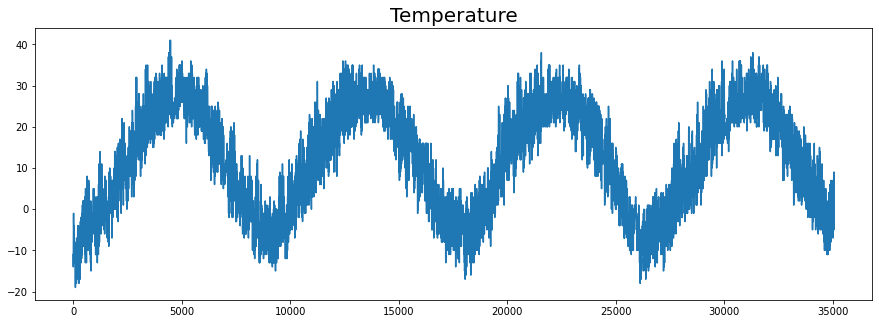

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(no_train, temp_train)
plt.title('Temperature',
          fontsize=20);

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
import tensorflow as tf

train_set = windowed_dataset(temp_train, window_size=60, batch_size=100, shuffle_buffer=1000)
test_set = windowed_dataset(temp_test, window_size=60, batch_size=100, shuffle_buffer=1000)

model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])

history = model.fit(train_set, validation_data=test_set, epochs=10)

Epoch 1/10
350/350 [==============================] - 46s 119ms/step - loss: 11.5671 - mae: 12.0565 - val_loss: 7.3742 - val_mae: 7.8606
Epoch 2/10
350/350 [==============================] - 39s 112ms/step - loss: 4.4893 - mae: 4.9680 - val_loss: 3.2331 - val_mae: 3.7091
Epoch 3/10
350/350 [==============================] - 40s 113ms/step - loss: 2.8956 - mae: 3.3639 - val_loss: 2.5282 - val_mae: 2.9956
Epoch 4/10
350/350 [==============================] - 40s 115ms/step - loss: 2.3256 - mae: 2.7832 - val_loss: 1.8896 - val_mae: 2.3444
Epoch 5/10
350/350 [==============================] - 40s 115ms/step - loss: 1.6500 - mae: 2.0851 - val_loss: 1.1743 - val_mae: 1.5935
Epoch 6/10
350/350 [==============================] - 40s 114ms/step - loss: 1.3352 - mae: 1.7544 - val_loss: 1.0799 - val_mae: 1.5029
Epoch 7/10
350/350 [==============================] - 40s 114ms/step - loss: 1.1346 - mae: 1.5416 - val_loss: 0.8965 - val_mae: 1.2987
Epoch 8/10
350/350 [==============================] -

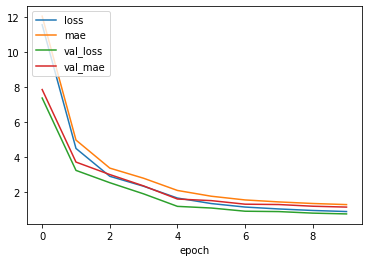

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_mae'])
plt.xlabel('epoch')
plt.legend(['loss', 'mae', 'val_loss', 'val_mae'], loc='upper left')
plt.show()